In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [34]:
#x,y=make_blobs(1000, centers=2, random_state=42)

In [35]:
X, y = make_blobs(1000, centers=2, random_state=0)

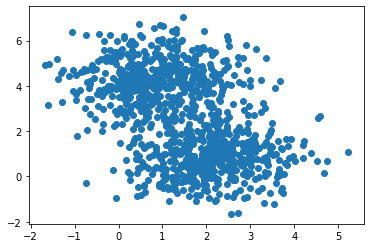

In [36]:
plt.scatter(X[:, 0], X[:, 1])

In [37]:
#x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=42) #spliting data

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [39]:
class KNN:
    def __init__(self,k=10):
        self.k=k
        self.x=None
        self.y=None
        
    def fit(self, x, y):
        self.x=x
        self.y=y
        
    def predict_point(self, point):
        
        distances =[]
        
        
        for x_item,y_item in zip(self.x,self.y):
            dis =KNN.distance(x_item,point)
            distances.append((dis, y_item))
            
        distance=sorted(distances)
        tops = np.array(distances[:self.k])
        
        
        vals,counts=np.unique(tops[:, 1],return_counts=True)
        
        return vals[np.argmax(counts)]
    
    def predict(self, x):
        outs=[]
        for point in x:
            outs.append(self.predict_point(point))
        return np.array(outs, dtype=int)
    
    def score(self, x, y):
        return sum(self.predict(x)==y)/ len(y)
        
    
    @classmethod
    def distance(cls,p1,p2):
        return np.sum((p1-p2)**2)
    
        

In [40]:
model=KNN(5)

In [41]:
model.fit(X_train, y_train)

In [42]:
model.predict(X_test[:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
model.score(X_test, y_test)

0.47878787878787876

In [44]:
model.fit(x_train,y_train)
model.score(x_test, y_test)

0.47878787878787876

In [45]:
print (model.predict_point(x[0]))

1.0


In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
m2 = KNeighborsClassifier(5)

In [48]:
m2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
m2.score(X_test, y_test)

0.9575757575757575

In [50]:
m2.predict(X_test[:10])

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1])

## KNN Algorithm.ipynb (Online)


In [10]:
import pandas as pd

In [11]:
plt.style.use('seaborn')

In [12]:
dfx = pd.read_csv('xdata.csv')
dfy = pd.read_csv('ydata.csv')

In [13]:
X = dfx.values
Y = dfy.values

X = X[:,1:]
Y = Y[:,1:].reshape((-1,))

#print(X)

print(X.shape)
print(Y.shape)

#print(Y)

(399, 2)
(399,)


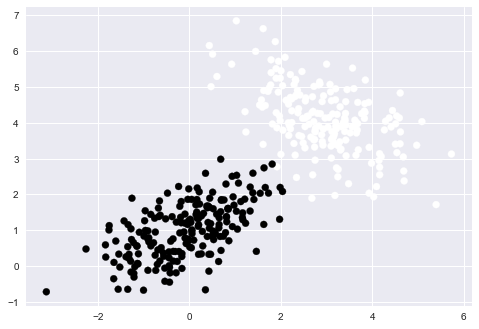

In [14]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

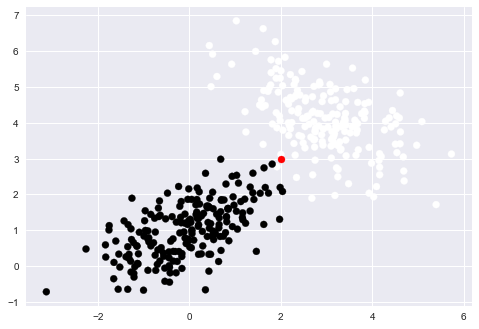

In [15]:
query_x = np.array([2,3])
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(query_x[0],query_x[1],color='red')
plt.show()

In [16]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

# Test Time 
def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [17]:

x = knn(X,Y,[0,0])
print(x)

1.0
